In [2]:
#Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [48]:
#Import Cleaned Code
szn_78 = pd.read_csv('teams_07_08.csv')
szn_89 = pd.read_csv('teams_08_09.csv')
szn_910 = pd.read_csv('teams_09_10.csv')
szn_1011 = pd.read_csv('teams_10_11.csv')
szn_1112 = pd.read_csv('teams_11_12.csv')
szn_1314 = pd.read_csv('teams_13_14.csv')
szn_1415 = pd.read_csv('teams_14_15.csv')
szn_1516 = pd.read_csv('teams_15_16.csv')
szn_1617 = pd.read_csv('teams_16_17.csv')
szn_1718 = pd.read_csv('teams_17_18.csv')

#Aggregating past season data / Creating Binary Dependent Variable
szn_lists = [szn_78, szn_89, szn_910, szn_1011, szn_1112, szn_1314, szn_1415, szn_1516, szn_1617, szn_1718]
past_szns = pd.concat(szn_lists, axis=0, ignore_index=True)
past_szns['binary_playoffs'] = past_szns['made_playoffs'].apply(lambda x: 1 if x == 'Yes' else 0)
past_szns.head()

,Unnamed: 0,team_name,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,made_playoffs,binary_playoffs
0,0,New Jersey Devils,21.0,25.0,20.0,16.0,206.0,197.0,Yes,1
1,1,Philadelphia Flyers,21.0,21.0,20.0,20.0,248.0,233.0,Yes,1
2,2,Los Angeles Kings,15.0,17.0,26.0,24.0,231.0,266.0,No,0
3,3,Tampa Bay Lightning,11.0,20.0,30.0,21.0,223.0,267.0,No,0
4,4,Boston Bruins,20.0,21.0,21.0,20.0,212.0,222.0,Yes,1


In [20]:
model = sm.logit(formula = 'binary_playoffs~away_wins+home_wins+total_goals_against+total_goals_scored', data = past_szns).fit() #Developing logistic regression model
model.summary()

Optimization terminated successfully.
         Current function value: 0.147874
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  330
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                            4
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.7865
Time:                        19:01:53   Log-Likelihood:                -48.798
converged:                       True   LL-Null:                       -228.59
Covariance Type:            nonrobust   LLR p-value:                 1.499e-76
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -18.4671      6.738     -2.741      0.006     -31.673      -5.261
away_wins               0.7085      0.177      3.996      0.000       0.361       1.056
home_wins               0.6762      0.159      4.250      0.000       0.364       0.988
total_goals_against    -0.0882      0.028     -3.129      0.002      -0.143      -0.033
total_goals_scored      0.0450      0.026      1.745      0.081      -0.006       0.096
=======================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Important insight on the initial model, adding away_losses and home_losses to the model would cause the model algorithm to not converge -> leading primarily to a P>|z| value roughly equal to 1 in every prediction variable (the model breaks). This is suggests our model has complete separation or complete quasi-separation meaning that a predictor variable perfeclty separates (predicts) our outcome variable. This is useful to our analysis; however, it causes the Maximum Likelihood Estimate to incorrectly calculate coefficients for our model.**

**As discovered later, our model is already very accurate and, since we are not familiar with how to approach this type of problem, the separating variables were excluded from the model.**

Text(0.5, 0, 'Total Goals Scored')

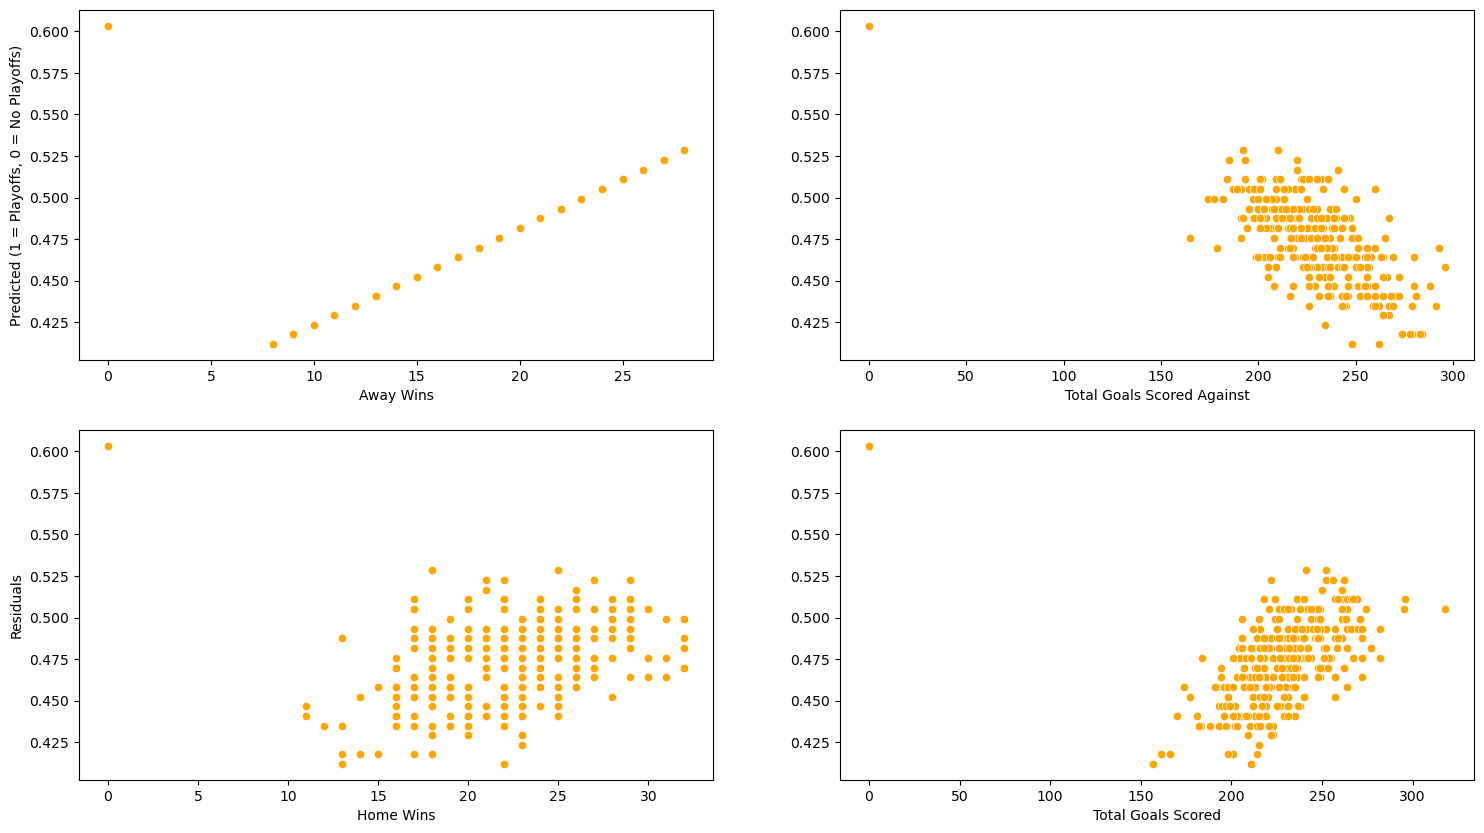

In [40]:
# Graph the Relationship between Predictor Variables and Model Prediction on Training Data
fig, axes = plt.subplots(2,2, figsize=(18, 10))

sns.scatterplot(ax=axes[0][0], x = past_szns.away_wins, y=model.predict(past_szns),color = 'orange')
axes[0][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')
axes[0][0].set_xlabel('Away Wins')

sns.scatterplot(ax=axes[1][0], x = past_szns.home_wins, y=model.predict(past_szns),color = 'orange')
axes[1][0].set_xlabel('Home Wins')
axes[1][0].set_ylabel('Residuals')

sns.scatterplot(ax=axes[0][1], x = past_szns.total_goals_against, y=model.predict(past_szns),color = 'orange')
axes[0][1].set_xlabel('Total Goals Scored Against')

sns.scatterplot(ax=axes[1][1], x = past_szns.total_goals_scored, y=model.predict(past_szns),color = 'orange')
axes[1][1].set_xlabel('Total Goals Scored')

In [41]:
# Remove the Outliers to better the fit of the Model (pretty sure no team has not won a game or never scored a goal during the season)
past_szns = past_szns.loc[past_szns['home_wins'] != 0]
past_szns = past_szns.loc[past_szns['away_wins'] != 0]
past_szns = past_szns.loc[past_szns['total_goals_against'] != 0]
past_szns = past_szns.loc[past_szns['total_goals_scored'] != 0]

# Recalculate Model and Graphs without Outliers
model = sm.logit(formula = 'binary_playoffs~away_wins+home_wins+total_goals_against+total_goals_scored', data = past_szns).fit() #Developing logistic regression model
model.summary()

Optimization terminated successfully.
         Current function value: 0.162121
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  301
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            4
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                  0.7654
Time:                        19:30:38   Log-Likelihood:                -48.798
converged:                       True   LL-Null:                       -208.04
Covariance Type:            nonrobust   LLR p-value:                 1.117e-67
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -18.4671      6.738     -2.741      0.006     -31.673      -5.261
away_wins               0.7085      0.177      3.996      0.000       0.361       1.056
home_wins               0.6762      0.159      4.250      0.000       0.364       0.988
total_goals_against    -0.0882      0.028     -3.129      0.002      -0.143      -0.033
total_goals_scored      0.0450      0.026      1.745      0.081      -0.006       0.096
=======================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Text(0.5, 0, 'Total Goals Scored')

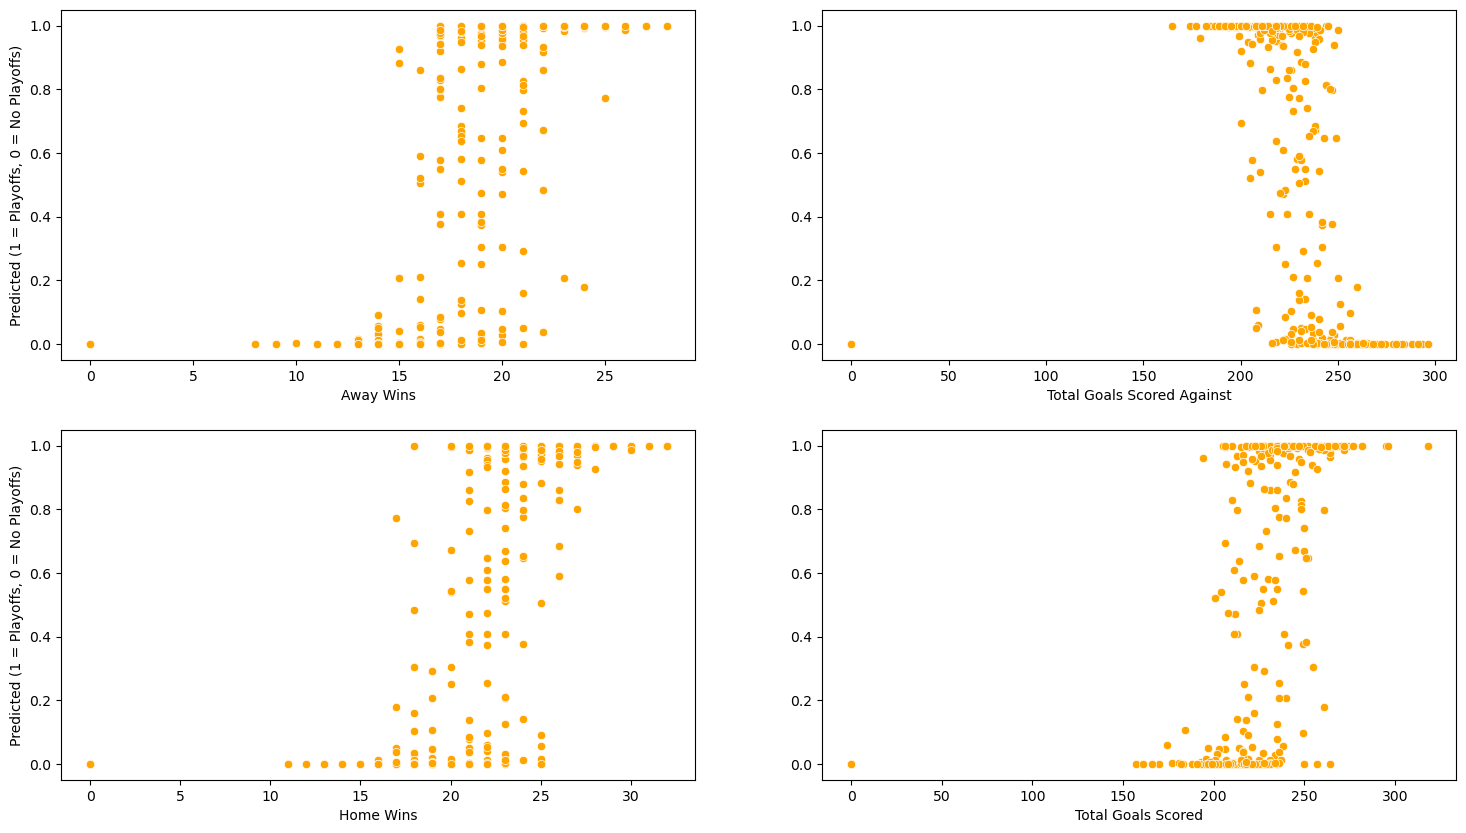

In [85]:
# Graph the Relationship between Predictor Variables and Model Prediction on Training Data (No Outliers)
fig, axes = plt.subplots(2,2, figsize=(18, 10))

sns.scatterplot(ax=axes[0][0], x = past_szns.away_wins, y=model.predict(past_szns),color = 'orange')
axes[0][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')
axes[0][0].set_xlabel('Away Wins')

sns.scatterplot(ax=axes[1][0], x = past_szns.home_wins, y=model.predict(past_szns),color = 'orange')
axes[1][0].set_xlabel('Home Wins')
axes[1][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')

sns.scatterplot(ax=axes[0][1], x = past_szns.total_goals_against, y=model.predict(past_szns),color = 'orange')
axes[0][1].set_xlabel('Total Goals Scored Against')

sns.scatterplot(ax=axes[1][1], x = past_szns.total_goals_scored, y=model.predict(past_szns),color = 'orange')
axes[1][1].set_xlabel('Total Goals Scored')

**Ultimately, removing the outliers did not affect the model at all; nonetheless, the relationship between predictor/prediction is more detailed within the graphs.**

________________________

In [45]:
# Building Out Confusion Matrices
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
def confusion_matrix_test(data,actual_values,model,cutoff=0.3):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Classification accuracy = 91.0%


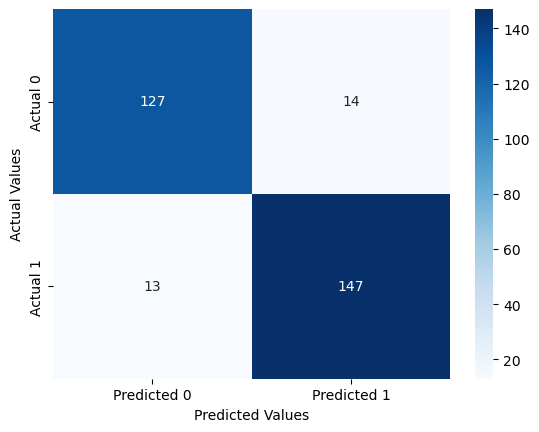

In [44]:
confusion_matrix_train(model)

In [46]:
#Recall
147 / (147 + 13)

0.91875

In [47]:
#Precision
147 / (147 + 14)

0.9130434782608695

**With our current model and a threshold of 0.5, our model accurately predicts whether a team made the playoffs in training data 91% of the time with a Precision and Recall value also roughly equal to 91%.**

____________

In [51]:
# Make Test Data Utilizing Random Sample / Retrain Model and Evaluate Test Data Accuracy

In [58]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(past_szns)
model = sm.logit(formula = 'binary_playoffs~away_wins+home_wins+total_goals_against+total_goals_scored', data = train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.144582
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  247
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.7914
Time:                        13:27:55   Log-Likelihood:                -35.712
converged:                       True   LL-Null:                       -171.21
Covariance Type:            nonrobust   LLR p-value:                 1.954e-57
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -12.4064      7.572     -1.638      0.101     -27.248       2.435
away_wins               0.5797      0.226      2.563      0.010       0.136       1.023
home_wins               0.6173      0.178      3.460      0.001       0.268       0.967
total_goals_against    -0.1185      0.037     -3.247      0.001      -0.190      -0.047
total_goals_scored      0.0663      0.034      1.970      0.049       0.000       0.132
=======================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Classification accuracy = 93.9%


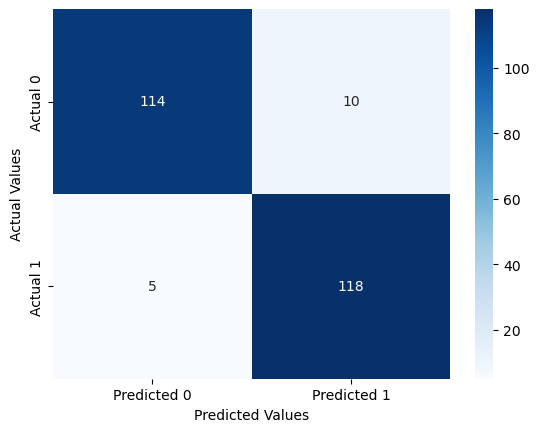

In [59]:
confusion_matrix_train(model)

Classification accuracy = 89.2%


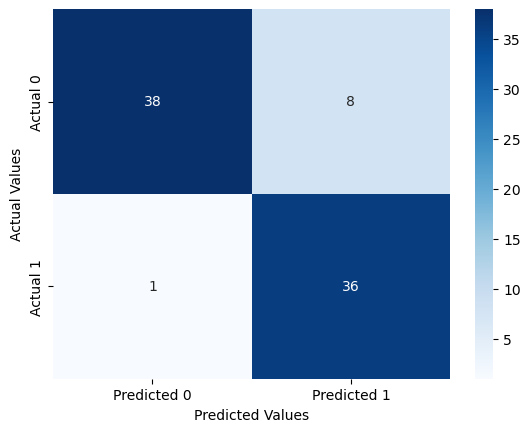

In [60]:
confusion_matrix_test(test, test.binary_playoffs, model)

**After randomly splitting our data into a train and test dataset, the model maintains relatively similar accuracies.**

__________

In [63]:
# Philosophy for Data Frame
# Make a Dataframe of every possible outcome of the Predator's Season, see which outcomes yield a predicted Playoff Appearance

# Currently, Predators have 16 home wins, 12 away wins, 160 goals scored, 168 goals against
# There are 41 home/away games : Preds have played 29/27 : Max home/away wins is 28/26 : https://www.statmuse.com/nhl/ask/nashville-predators-home-and-away-stats-this-season
# Most goals scored by a team in a season is 446, Interestingly, record for most goals against is also 446 (different teams)
# With 26 games left, Predators would need 11 pts a game (very unlikely), instead let us compare to the current leader in 
# goals per game (3.83) and, for simplicity, argue the maximum average amount of goals scored/against by any team is capped at
# 4 goals per game. This implies that the Predators goals scored is maxed at 264, and goals against is maxed at 272.

In [101]:
# Making the DataFrame
rows = []

for home_win in range(16, 29):
    for away_win in range(12, 27):
        for goals_scored in range(160, 265):
            for goals_against in range(168, 273):
                rows.append([home_win, away_win, goals_scored, goals_against])

preds_df = pd.DataFrame(rows, columns = ['home_wins','away_wins','total_goals_scored','total_goals_against'])
preds_df

,home_wins,away_wins,total_goals_scored,total_goals_against
0,16,12,160,168
1,16,12,160,169
2,16,12,160,170
3,16,12,160,171
4,16,12,160,172
...,...,...,...,...
2149870,28,26,264,268
2149871,28,26,264,269
2149872,28,26,264,270
2149873,28,26,264,271


In [102]:
preds_df['predicted_playoff'] = model.predict(preds_df)
preds_df

,home_wins,away_wins,total_goals_scored,total_goals_against,predicted_playoff
0,16,12,160,168,0.007523
1,16,12,160,169,0.006687
2,16,12,160,170,0.005944
3,16,12,160,171,0.005283
4,16,12,160,172,0.004695
...,...,...,...,...,...
2149870,28,26,264,268,0.996601
2149871,28,26,264,269,0.996175
2149872,28,26,264,270,0.995695
2149873,28,26,264,271,0.995156


In [116]:
# Set a High Threshold (75%) because we care more about the accuracy of our recommendation
preds_df['binary_playoff'] = preds_df['predicted_playoff'].apply(lambda x: 1 if x >= 0.75 else 0)
preds_df.loc[preds_df['binary_playoff']==1].shape[0] / preds_df.shape[0]

0.4341126809698238

**With a 75% threshold, the Predators will make the playoffs in roughly 43% of their potential end season stats.**

___________

In [113]:
# Hard to Visualize Impact, Need a Better Way to Look at Things
preds_df.groupby('home_wins')['predicted_playoff'].mean()

home_wins
16    0.256318
17    0.294943
18    0.335692
19    0.378196
20    0.422039
21    0.466759
22    0.511857
23    0.556819
24    0.601139
25    0.644333
26    0.685964
27    0.725640
28    0.763016
Name: predicted_playoff, dtype: float64

In [114]:
preds_df.groupby('away_wins')['predicted_playoff'].mean()

away_wins
12    0.231735
13    0.267094
14    0.304558
15    0.343831
16    0.384590
17    0.426474
18    0.469089
19    0.512017
20    0.554823
21    0.597079
22    0.638380
23    0.678350
24    0.716648
25    0.752968
26    0.787035
Name: predicted_playoff, dtype: float64

In [117]:
variable = cutoff_pt_df.groupby('total_goals_scored')['binary_playoff'].mean()
variable.loc[variable >= 0.75]

total_goals_scored
237    0.752381
238    0.752381
239    0.761905
240    0.761905
241    0.771429
242    0.780952
243    0.780952
244    0.790476
245    0.790476
246    0.800000
247    0.800000
248    0.809524
249    0.809524
250    0.819048
251    0.828571
252    0.828571
253    0.838095
254    0.838095
255    0.847619
256    0.847619
257    0.857143
258    0.866667
259    0.866667
260    0.876190
261    0.876190
262    0.885714
263    0.885714
264    0.895238
Name: binary_playoff, dtype: float64

In [118]:
variable = cutoff_pt_df.groupby('total_goals_against')['binary_playoff'].mean()
variable.loc[variable >= 0.75]

total_goals_against
168    1.000000
169    1.000000
170    1.000000
171    1.000000
172    1.000000
173    1.000000
174    1.000000
175    1.000000
176    1.000000
177    1.000000
178    1.000000
179    1.000000
180    1.000000
181    1.000000
182    1.000000
183    1.000000
184    1.000000
185    1.000000
186    1.000000
187    1.000000
188    1.000000
189    1.000000
190    1.000000
191    1.000000
192    1.000000
193    1.000000
194    1.000000
195    1.000000
196    1.000000
197    1.000000
198    1.000000
199    1.000000
200    1.000000
201    1.000000
202    1.000000
203    1.000000
204    0.980952
205    0.961905
206    0.952381
207    0.933333
208    0.914286
209    0.895238
210    0.876190
211    0.866667
212    0.847619
213    0.828571
214    0.809524
215    0.790476
216    0.780952
217    0.761905
Name: binary_playoff, dtype: float64

**From these values and our cutoff of 75%, it appears that looking purely at wins (unsuprisingly) to maintain a 75% chance to make the playoffs, the Predators will need win almost all of the rest of their games (ending with 28 home / 25 away). With the goals scored, there is more room to work with that may improve our recommendation. Simply scoring 237 goals and limiting other teams to 217 goals against them, will (on average) lead the raptors to a playoff qualification in our model. This is roughly equal to ~2.96 goals scored a game and ~1.88 goals against a game.**

In [121]:
# Running Recommedation
model.predict(pd.DataFrame([[28,25,237,217]], columns=['home_wins','away_wins','total_goals_scored','total_goals_against']))

0    0.999914
dtype: float64

**With these recommendations, while each of them individually would allow the team a 75% chance to qualify for the playoffs, if all of these recommednations are met, our model predicts an almost 100% chance for the Predators to qualify.**